<a href="https://colab.research.google.com/github/onni-Q/lecture_notebooks/blob/main/Week3_Lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please run the cell below to set up the environment.

In [36]:
#Keep cell
%%capture

import os
import importlib

try:
  import palettable
except:
  !pip install palettable
  import palettable


if not(os.path.exists('snsdata.csv')):
  print('Downloading snsdata.csv\n')
  !wget https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/snsdata.csv

if not(os.path.exists('spotify-dataset.csv')):
  print('Downloading spotify-dataset.csv\n')
  !wget https://raw.githubusercontent.com/goto4711/cdai/refs/heads/main/spotify-dataset.csv

if not(os.path.exists('CDAIML.py')):
  print('Downloading CDAIML.py\n')
  !wget https://raw.githubusercontent.com/goto4711/cdai/refs/heads/main/CDAIML.py


from CDAIML import DrawNN
from CDAIML import display_youtube

# Machine Learning

## Supervised Machine Learning

Today, we will learn that machine learning is much less scary than science fiction wants us to believe. This is not because we have benevolent machines, which only want our best, but simply because these machines are quite far away from living their own life without our input, as Skynet manages in 'Terminator'. For the time being, machines still learn best when provided with human input. Furthermore, machines learn in most applications not because they want to start to understand the meaning of life and find out that humans are obstacles to true life, but because they learn to complete a particular task. Machines learn to be parts of the workbenches of digital productions.

Machines still largely learn from our examples and need to be fed with large amounts of data to learn. But this makes machine learning also an ethically difficult endeavour. Machine learning demands ever more data, which requires vast amounts of energy. Most aspects of our lives are recorded in gigantic data stores that are easily accessible to machines. Governments, businesses and individuals are recording and reporting all manners of information from the monumental to the mundane. As long as the activities can be transformed into digital formats, you can be certain that somebody will record it.

In such a world, machines learn by consuming data and humans continuously add new digital methods of machine learning that can exploit this data. These can be some of the simple statistical methods we have already met or more advanced ones, we will meet today. The digital methods we learn about today have in common that they aim to predict new observations from old observations. They are all empirical and predictive using models.

Machine-learning algorithms are all around you. They have tried to predict the outcomes of elections and referenda, can identify spam messages, predict crime and natural disasters, target donors and voters as well as have learned how to drive cars - sometimes. They also frequently get it wrong, as many news articles will tell you. Many stories are told about the uses and abuses of machine learning. Given how much machine learning is now part of our everyday life, it is maybe surprising that there are not even more such stories.

We also still lack an ethics of machine learning, which is developing so fast that it is difficult for laws and norms to stay up to date. There is, for instance, an on-going debate how biased machine learning algorithms are with regard to race and gender. Machine learning has also made it possible to identify people based on the region they live, the products they buy, etc. As a machine-learning practitioner, you are often required to exclude revealing data that is ethically problematic. But this is not an easy task, as sometimes the connections are not obvious and might only be revealed after you have trained the machine to learn.

As a machine-learning practitioner, you will also quickly find out that many of the processes of machine learning repeat themselves and are made easier nowadays with powerful Python libraries, ChatGPT and Gemini. Today we start with how so-called 'supervised machine learning' relies on labelled input and output training data, whereas 'unsupervised learning' processes unlabelled or raw data but often requires extensive human interpretation efforts. In this session, you will get to know some of the most important algorithms - supervised and unsupervised - to deal with what we call structured data (https://www.ibm.com/think/topics/structured-vs-unstructured-data). Structured data looks like tables in a spreadsheet and is highly organized and easily decipherable by machine-learning algorithms.

By the end of this lecture, you will understand:
-	The basic principles of supervised and unsupervised machine learning.
-	The typical data-science workflow: data collection, preparation, modelling and evaluation.
-	How to prepare data for machine learning with normalization, handling missing values, etc..
-	The concept of neural networks for classification.
-	How to implement a simple neural network using scikit-learn.
-	The concept of k-means clustering and how to implement it using scikit-learn and interpret basic results.

This might seem like a very fast-paced session, but the principles of it should be not so hard to understand. In fact, the most important thing to understand is what the data-science workflow is and that there is this miracle Python library `scikit-learn` that does all the hard work.

We start with neural networks for supervised learning and finish with clustering and unsupervised learning.

Let's load today's libraries that should be familiar to you by now. Run the cell below.

In [37]:
#Keep cell
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Sidebar: The Data Science Process

### A word on our data

Just like humans, machines use data to generalize. They abstract the data and develop its underlying principles, because humans tell them how. In the words of machine learning, machines form a model, which assigns meaning and represents knowledge. The model summarizes the data and makes explicit patterns among data.

There are many different types of models. We have already seen some and others you will know from school. Models can be (statistical) equations, figures like graphs or trees, rules or clusters. Machines don't choose the type of models. We choose them for them when analysing the task at hand and the available data.

The computer learns to fit the model to the data in a process called training. However, computational modelling does not end here. We also need to test the model in a separate testing process. The model thus does not include anything else but what can be found in the data already. It can nevertheless be interesting, as the model might surface connections that we did not recognize before. Newton discovered gravity this way by fitting a series of equations (a model) to observations of falling apples - if the myth is to be believed. Gravity was always there, but it was observed for the first time in a model. Modelling is then also never perfect. It generally involves some kind of bias or systematic error. Newton's laws of gravity are not as universal as he thought they would be. Errors like this do not have to be a bad thing, because they can lead the computer to learning a better model, correcting previous mistakes.

Unfortunately, especially in our domain of social and cultural data analysis, models often fall short of desirable performance. Humans are difficult for computers and their data is very noisy. Humans are also inconsistent and report data wrongly. This means that social and cultural data includes many errors because observations have not been measured correctly or maybe they are simply impossible to measure. How do you quantify, for instance, love? It seems impossible, but online match-making agencies still make a business out of predicting love. Finally, especially in history we simply do not have data for all time periods. Often, the records have been lost. Even if we have data, it will include many missing values or will be badly captured according to diverse and sometimes contradictory standards.

A final complication with data in social and cultural data analysis that has only recently emerged is the limited access we have to the data. Because it is so valuable, it is kept behind the walls of company servers or government agencies and is not shared.

So, machine learning is not artificial intelligence yet, but a laborious collaboration between humans and machines that involves trying models and fighting with (bad) data. Machine learning then leads to data science, which is a process that consists of a series of repeatable steps, which we will learn about today.

Schutt and O'Neil (2013), have given us an excellent overview of the art of data science.

![alt text](https://github.com/goto4711/cdai/blob/main/process.png?raw=true "The Art of Data Science ")

According to the Figure, we first need to collect (raw) data in a form that we can process it. The next step explores the data and cleans it. People in data analysis like to emphasize that this is about 80% of the whole work. Then, we need a question we would like to answer with the data. This question will of course be at the beginning of our work but will likely also change after the initial exploration. Based on the question and the exploration, we start with the model and train it using a subset of the data. After training, we need to evaluate the model's performance by running a series of test predictions against test data. The result of the evaluation will then be used to improve the model's performance iteratively until we are satisfied that the model performs as best as possible, and decisions can be confidently made.

Before we experience the art of machine learning and prediction, let's quickly remind ourselves of what data is in the eye of the machine. Data generally describes a series of observations, which in Python may be captured in the rows of a dataframe. Each observation is defined by its features (characteristics), which are the columns of a dataframe. If a feature represents a characteristic measured in numbers, it is unsurprisingly called numeric. For instance, the ages of a group of students is numerical. Alternatively, if a feature measures an attribute that is represented by a set of categories, the feature is called categorical or nominal. For instance, the colour codes for red, green and blue are categorical. A special case of categorical variables is called ordinal, which designates a nominal variable with categories falling in an ordered list. Movie reviews on Netflix are, for instance, ordinal, because they cover numbers from 1 to 5 but it is not clear what lies, e.g., between 2 and 3.

Our friends from DataCamp have provided this nice overview:

![alt text](https://github.com/goto4711/cdai/blob/main/D08t9.jpg?raw=true "Qualitative and Quantitative Data")

Can you see how problematic certain characterizations can be? The image is taken from their tutorial at https://www.datacamp.com/tutorial/categorical-data.  

Today, we focus on some very classic machine-learning approaches and start with the much larger group of supervised-learning algorithms, where an algorithm is given a set of training data and then learns a combination of features that predicts certain behaviour such as whether an earthquake will take place soon or a crime will be committed. What we are trying to predict is also called a target variable; or sometimes also label.

## Predicting Taste

Today, we will predict something that seems to define a human as inherently subjective. We will predict music and in particular how danceable it is. In the language of machine learning, this is a classification task. Our classification will predict whether any music from Spotify will fall into either one of two classes: good or bad danceability.

We will thus solve an ancient problem of philosophy, which interrogates the aesthetic judgement (http://plato.stanford.edu/entries/aesthetic-judgment/). For the German philosopher Kant, taste judgments are universal and subjective at the same time. A key part of his Critique of Judgement, Kant demands more from taste than we are generally willing to attribute to it: 'Many things may for [a person] possess charm and agreeableness — no one cares about that; but when he puts a thing on a pedestal and calls it beautiful, he demands the same delight from others. He judges not merely for himself, but for all men, and then speaks of beauty as if it were a property of things. (…). He blames them if they judge differently, and denies them taste, which he still requires of them as something they ought to have; (…).' (http://oll.libertyfund.org/titles/kant-the-critique-of-judgement, §7). Today, we will use the machine to find out how something can be subjective and universal at the same time.

### Sidebar: Feature Spaces

To illustrate how machines classify, let's first go through a simplified dataset that helps us understand taste not just for music. Because we like it sweet and crunchy, we create a training dataset by tasting 15 foods and record for each of them how crunchy and how sweet they were. Both crunchy and sweet are defined as ordinal features with a range from 1 to 10. Next, we would like to map this data into a so-called 'feature space' with two axes: one for crunchiness and one for sweetness. This example is taken from the old but still excellent 'Machine Learning' (Lantz, B. (2013). Packt Publishing Ltd.), which will later on also provide us with a nice dataset to work though unsupervised learning.

Lantz produced a nice visualisation of such a feature space with a few example foods:
![alt text](https://github.com/goto4711/cdai/blob/main/lantz-1.png?raw=true "")

Lantz notices that in this feature space 'similar types of food tend to be grouped closely together. (…), vegetables tend to be crunchy but not sweet, fruits tend to be sweet and either crunchy or not crunchy, while proteins tend to be neither crunchy nor sweet.' (p. 68). Similarity is thus based on the distance of the items in the feature space.

![alt text](https://github.com/goto4711/cdai/blob/main/lantz-2.png?raw=true "")

Next, we taste for the first time a tomato and add it to the feature space.

![alt text](https://github.com/goto4711/cdai/blob/main/lantz-3.png?raw=true "")

Based on this mapping how would we classify the tomato? Is it a vegetable or a fruit? The figure is not very conclusive, because we cannot really determine which group the tomato is closer to in the feature space. We need to find an algorithm for that.

You have just learned how a machine would learn and think about the tomato as well as which decisions it would have to make to understand tomatoes. Machines learn similarities in feature spaces using distances.



## Machine Dancing

Let's go next through our example of understanding music next and explore the individual steps of machine learning more closely. The data comes from the Kaggle copy of a famous dataset from Spotify: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset. We will talk more about Kaggle in the workshops and future lectures. For now, we have downloaded the data for your, and it's enough to know that Kaggle is a famous repository for machine learning datasets - among other things.

The Spotify Tracks Dataset was created through systematic use of Spotify's Web API to collect track metadata, audio features and genre classifications across 125 different musical genres (https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset). While the exact technical implementation details weren't documented by the creator, the dataset follows standard patterns for Spotify API data collection, leveraging the platform's sophisticated audio analysis capabilities and genre classification system. The dataset includes Spotify's pre-computed audio features, which are derived through a combination of signal processing and algorithmic analysis ( https://developer.spotify.com/documentation/web-api/reference/get-audio-features). This leads to an impressive number of features for each track.


The Spotify data consists of a structured-data file in tabular format. According to its website, these are tracks over a range of 125 different genres. Each track has features associated with it, which are the columns:
- *track_id*: The Spotify ID for the track
artists: The artists' names who performed the track. If there is more than one artist, they are separated by ;
- *album_name*: The album name in which the track appears.
- *track_name*: Name of the track.
- *popularity*: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by an algorithm and is based, for the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
- *duration_ms*: The track length in milliseconds.
- *explicit:* Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown).
- *danceability*: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- *energy*: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on this scale.
- *key*: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
- *loudness*: The overall loudness of a track in decibels (dB).
- *mode*: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- *speechiness*: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- *acousticness*: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence that the track is acoustic.
- *instrumentalness*: Predicts whether a track contains no vocals. 'Ooh' and 'aah' sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly 'vocal'. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
- *liveness*: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- *valence*: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g., happy, cheerful or euphoric), while tracks with low valence sound more negative (e.g., sad, depressed or angry).
- *tempo*: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
- *time_signature*: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
- *track_genre*: The genre, in which the track belongs.

As you can see, even music can be transformed into a number of measurable features. It is quite complex and you don't need to remember all the details now. BTW: This example is based on one of the previous years' data projects at the end of the semester. So, feel inspired ...

The first step for us is to download the structured data so that we can work with it. Let us repeat one more time the steps in detail. Perhaps the most common data format of freely available structured data are Comma-Separated Values (CSV) files, which, as the name suggests, uses the comma as a delimiter between feature columns. CSV files can be imported to and exported from many common data repositories. To load CSV into Python, we use Pandas's `read_csv()` function. You use it by specifying a path to the file you want to import, e.g. /path/to/mydata.csv, when calling the `pd.read_csv()` function after importing pandas again. Here, we use it to load the data directly from the web. Can you see how it is done?

The music data should be in the same folder/place as this notebook. So, you do not need to specify a so-called path. But generally this will not be the case. If you want to learn more about paths, you can watch this video: https://www.youtube.com/watch?v=0yIFEJ879lw.

### Collect Data

Run the next cell.

In [38]:
#Keep cell
music_df = pd.read_csv('spotify-dataset.csv')

This creates a dataframe `music_df` with all the features per music track. `read_csv()` directly accesses the dataframes from the local folder. We do this to make it easier for you to work with platforms like Google Colab.

This completes our first step to do machine learning, the data acquisition/collection. As you are learning, it is fairly easy, because we reuse existing material. The data is also complete, and we do not have to take care of any missing values.

Next let's move on to our objective for today. As described earlier, we want the machine to learn how to experience good and bad danceability. Let's take a first look at the dataset using Pandas's `.info()` first and then `head()`. Do you know how? You might want to ask Gemini.

In [39]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  float64
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [40]:
music_df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [41]:
music_df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666.0,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610.0,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826.0,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933.0,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853.0,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


There is a column called `danceability`, which we will use for our classification task. We will use it as the classification 'target'. Remember: `Danceability` is a numerical feature between 0 and 1, with a value of 0.0 being least danceable and 1.0 being most danceable. Now, let's see how `danceability` values are distributed. We decide to plot the classes with Seaborn's `sns.histplot(music_df['danceability'], bins=20)`. With `bins=20`, we create 20 bins to represent the whole data.

In [42]:
music_df['danceability'].median()

0.58

<Axes: xlabel='danceability', ylabel='Count'>

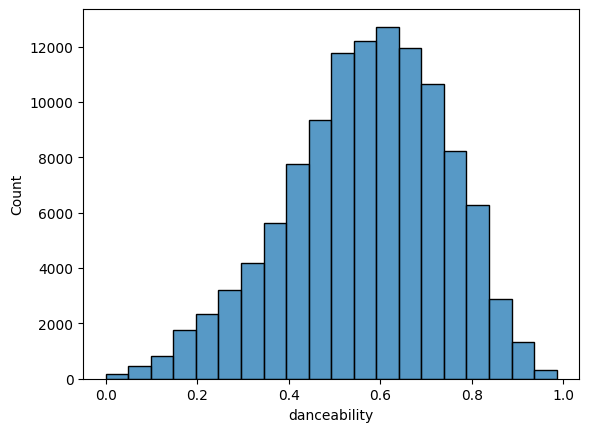

In [43]:
sns.histplot(music_df['danceability'], bins=20)

To make this a classification task, we need to make this numerical distribution into one of two classes: good or bad danceability. Looking at the figure/histogram, 0.6 seems to be a good cut-off point, as it splits the data in half.

A very nice function to do this is `np.where`. If you know it, you also know that it is easy with `music_df['dance_label'] = np.where(music_df['danceability'] >= DANCEABILITY_THRESHOLD, 1, 0)`: 0 stands for bad danceability, 1 for good danceability.

`DANCEABILITY_THRESHOLD` is a constant we can set as we want. We set it to our cut-off of 0.6. In code, you often see constants capitalized for easy access to them. It is good practice to define them in one place to reuse them later.

In [44]:
#Keep cell
DANCEABILITY_THRESHOLD = 0.6 # Let's say songs with danceability >= 0.6 are "High Danceability"

music_df['dance_label'] = np.where(music_df['danceability'] >= DANCEABILITY_THRESHOLD, 1, 0)

We have created a new column `dance_label` to decide whether a song is danceability and not. Let's see how this is distributed with value_counts(). Run `music_df['dance_label'].value_counts()`.

In [45]:
music_df['dance_label'].value_counts()

,count
dance_label,
0,61960
1,52040


As suspected, they are fairly evenly distributed and our threshold is well chosen.

But these are just numbers. Let's take a look at two examples. The first one is an example for music with least danceability and the second one with most danceability.

Run the next two cells. Please note that for copyright reasons you click on the image to open YouTube for this. YouTube does not allow you to run these within the notebook.

In [46]:
#Keep cell

least_danceable_example = "7eJ3I-_8Mr8"
display_youtube(least_danceable_example, video_title="Example of least danceable music")

In [47]:
#Keep cell

most_danceable_example = "zVcMi4YCLWQ"
display_youtube(most_danceable_example, video_title="Example of most danceable music")

Interesting. I am personally not sure about these choices. But it's a matter of taste ...

Please run `sns.histplot(data=music_df, x='danceability', hue='dance_label', multiple='stack', bins=20)` next to see how the new `dance_label` is distributed. `stack` stacks the two classes of `dance_label`.

<Axes: xlabel='danceability', ylabel='Count'>

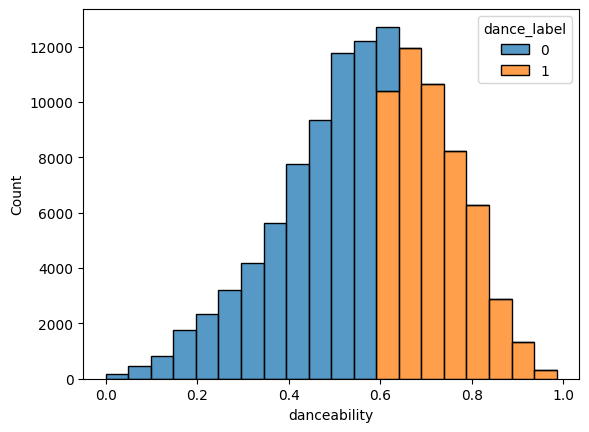

In [48]:
sns.histplot(data=music_df, x='danceability', hue='dance_label', multiple='stack', bins=20)

For a more advanced visualisation, run the next cell. It shows the top 10 genres for danceability. The kids are on top.

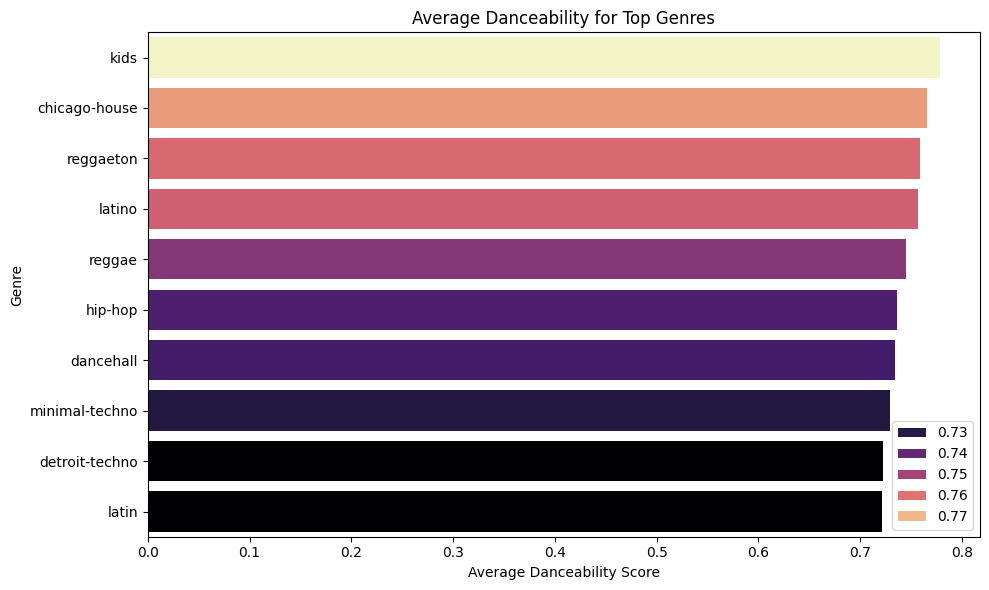

In [49]:
#Keep cell

plt.figure(figsize=(10, 6))
genre_counts = music_df['track_genre'].value_counts().nlargest(10)

avg_danceability_per_genre = music_df.groupby('track_genre')['danceability'].mean().sort_values(ascending=False).nlargest(10)
sns.barplot(x=avg_danceability_per_genre.values, y=avg_danceability_per_genre.index, hue = avg_danceability_per_genre.values, palette='magma', orient='h')
plt.title(f'Average Danceability for Top Genres')
plt.xlabel('Average Danceability Score')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

So, kids music is the most danceable? This seeems strange. In the workshop, we investigate these kinds of questions with machine learning.

It's time to prepare our data for its machine-learning adventures but first try to tell Gemini to load the Spotify dataset from https://raw.githubusercontent.com/goto4711/cdai/refs/heads/main/spotify-dataset.csv, create the dance_label column with a 0.6 threshold.

In [50]:
# load the dataset
url = "https://raw.githubusercontent.com/goto4711/cdai/refs/heads/main/spotify-dataset.csv"
df = pd.read_csv(url)

# create dance_label column
threshold = 0.6
df["dance_label"] = (df["danceability"] >= threshold).astype(int)

# inspect
print(df[["danceability", "dance_label"]])


        danceability  dance_label
0              0.676            1
1              0.420            0
2              0.438            0
3              0.266            0
4              0.618            1
...              ...          ...
113995         0.172            0
113996         0.174            0
113997         0.629            1
113998         0.587            0
113999         0.526            0

[114000 rows x 2 columns]


### Prepare Data

The next step in machine learning is very important for many algorithms based on feature spaces. We need to standardize the features, as the distances in the space are dependent on how the features are measured. In particular, if certain features have much larger values than others, the distance measurements will be strongly dominated by the larger values. This wasn't a problem for us before with the food data, as both sweetness and crunchiness were measured on a scale from 1 to 10. But suppose we added another measure on a scale from 1 to 1,000,000. This measure would dwarf the contribution of the other scales. The distances in the feature space would get out of scale.

We only need to normalize numeric data. Looking back at the results from `music_df.info()`, several columns/features are numeric. Next, we define a function to normalise these so that they are all on a scale between 0 and 1. We use the so-called min-max normalisation. Consider an example, where the the `popularity` of a track is 50, while we want to transform this to the range 0 to 1. So first we find the maximum value of `popularity`, which might be in this example 100 and the minimum value of `popularity`, say 20, then the new scaled value for will be: (50-20)/(100-20)=0.375. Can you see why this value is guaranteed to be between 0 and 1?

Lets define a function that takes care of the normalization for us. You hopefully remember how you can define your functions in Python? Anyway, just look at the next cell and run it.

In [51]:
def normalize(x):
    return ((x - x.min()) / (x.max() - x.min()))

Now, we want to select a number of `feature_cols`. These are the features we want investigate to see how they influence the danceability. Run the next cell.

In [52]:
feature_cols = [
    'duration_ms', 'popularity', 'energy', 'key', # 'danceability' removed
    'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'tempo', 'time_signature', 'valence'
]

music_features_df = music_df[feature_cols].copy()

This has also created `music_features_df`.

Apply is a powerful function in Pandas that let's you apply a function across several columns. Run to apply `normalize`:

```
music_features_normalized_df = music_features_df.apply(normalize)
```

In [53]:
music_features_normalized_df = music_features_df.apply(normalize)

Finally, let’s add the `dance_label` column to the new normalized dataframe. This time, it only contains good and bad danceability labels. Type in:
```
music_features_normalized_df['dance_label'] = music_df['dance_label']
music_features_normalized_df.head()
```

In [54]:
music_features_normalized_df['dance_label'] = music_df['dance_label']
music_features_normalized_df

,duration_ms,popularity,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,valence,dance_label
0,0.044043,0.73,0.4610,0.090909,0.791392,0.0,0.148187,0.032329,0.000001,0.3580,0.361245,0.8,0.718593,1
1,0.028566,0.55,0.1660,0.090909,0.597377,1.0,0.079067,0.927711,0.000006,0.1010,0.318397,0.8,0.268342,0
2,0.040255,0.57,0.3590,0.000000,0.736123,1.0,0.057720,0.210843,0.000000,0.1170,0.313643,0.8,0.120603,0
3,0.038557,0.71,0.0596,0.000000,0.573701,1.0,0.037617,0.908635,0.000071,0.1320,0.746758,0.6,0.143719,0
4,0.037969,0.82,0.4430,0.181818,0.737103,1.0,0.054508,0.470884,0.000000,0.0829,0.492863,0.8,0.167839,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,0.073511,0.21,0.2350,0.454545,0.612952,1.0,0.043731,0.642570,0.928000,0.0863,0.517705,1.0,0.034070,0
113996,0.073511,0.22,0.1170,0.000000,0.577345,0.0,0.041554,0.997992,0.976000,0.1050,0.350242,0.8,0.035176,0
113997,0.051833,0.22,0.3290,0.000000,0.714648,0.0,0.043523,0.870482,0.000000,0.0839,0.543933,0.8,0.746734,1
113998,0.054206,0.41,0.5060,0.636364,0.714759,1.0,0.030777,0.382530,0.000000,0.2700,0.558651,0.8,0.415075,0


In [55]:
music_features_normalized_df.describe()

,duration_ms,popularity,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,valence,dance_label
count,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,0.043539,0.332385,0.641383,0.482649,0.763406,0.637553,0.087722,0.316175,0.156050,0.213553,0.501898,0.780807,0.476450,0.456491
std,0.020487,0.223051,0.251529,0.323635,0.093027,0.480709,0.109567,0.333858,0.309555,0.190378,0.123178,0.086524,0.260564,0.498106
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.033236,0.170000,0.472000,0.181818,0.730962,0.000000,0.037202,0.016968,0.000000,0.098000,0.407684,0.800000,0.261307,0.000000
50%,0.040652,0.350000,0.685000,0.454545,0.786619,1.000000,0.050674,0.169679,0.000042,0.132000,0.501360,0.800000,0.466332,0.000000
75%,0.049932,0.500000,0.854000,0.727273,0.823632,1.000000,0.087565,0.600402,0.049000,0.273000,0.575543,0.800000,0.686432,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Can you find a prompt for Gemini to recreate these steps? Type in "Normalise all numeric columns of music_df with min max but keep the dance-label column unchanged".

We are now satisfied with the data, finished our cleaning and all other preparations. We can start the modelling process in order to predict how music will be danceable. If you run this on your own machine, you might want to first save the data after all the hard work. In Pandas, this means we pickle it: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_pickle.html. Run `music_features_normalized_df.to_pickle('music_features_normalized_df.pkl')`.

You can also ignore this step, as the example is simple and runs quickly when you repeat it.

In [56]:
music_features_normalized_df.to_pickle('music_features_normalized_df.pkl')

### Define the Training Data

From `info()` and `value_counts()`, we know that we have 114,000 music danceability observations with 61,960 labelled bad and 52,040 labelled good.

Because we aim to predict new things, our next step should be to find out about things we do not already know and how the model would be able to predict unknown data. If we had access to more music data, we could collect it and apply our model to these unknown observations and see how well the predictions compare to new music. But we cannot know about data we do not have. So, we simulate such a scenario by dividing our data into a training dataset that will be used to build the model and a test dataset. We will use the test dataset to simulate the prediction with new data and find out how well our model behaves on unknown data. This is the standard evaluation way of machine learning.

We will use 80% of our data for the training and 20% for testing. First, we randomly shuffle the data to ensure that all qualities are evenly distributed in both training and test data. Pandas has a function for that called sample. Create the training data with `train_set = music_features_normalized_df.sample(frac=0.80)`. `frac` is the fraction of data to be included in the training data.

In [57]:
train_set = music_features_normalized_df.sample(frac=0.80)

Check `info()` on `train_set` to see the changes.

In [58]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91200 entries, 84575 to 101117
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_ms       91200 non-null  float64
 1   popularity        91200 non-null  float64
 2   energy            91200 non-null  float64
 3   key               91200 non-null  float64
 4   loudness          91200 non-null  float64
 5   mode              91200 non-null  float64
 6   speechiness       91200 non-null  float64
 7   acousticness      91200 non-null  float64
 8   instrumentalness  91200 non-null  float64
 9   liveness          91200 non-null  float64
 10  tempo             91200 non-null  float64
 11  time_signature    91200 non-null  float64
 12  valence           91200 non-null  float64
 13  dance_label       91200 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 10.4 MB


In [59]:
train_set.describe()

,duration_ms,popularity,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,valence,dance_label
count,91200.000000,91200.000000,91200.000000,91200.000000,91200.000000,91200.000000,91200.000000,91200.000000,91200.000000,91200.000000,91200.000000,91200.000000,91200.000000,91200.000000
mean,0.043557,0.332549,0.641178,0.482671,0.763302,0.636283,0.087621,0.315650,0.156895,0.214097,0.501520,0.780691,0.475859,0.456711
std,0.020518,0.222940,0.251741,0.323366,0.093182,0.481071,0.109620,0.333936,0.310068,0.191029,0.123221,0.087115,0.260725,0.498125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.033236,0.170000,0.472000,0.181818,0.731068,0.000000,0.037202,0.016667,0.000000,0.098100,0.407101,0.800000,0.260302,0.000000
50%,0.040665,0.350000,0.684000,0.454545,0.786564,1.000000,0.050674,0.167671,0.000044,0.132000,0.501315,0.800000,0.465327,0.000000
75%,0.049980,0.500000,0.854000,0.727273,0.823632,1.000000,0.087461,0.599398,0.050900,0.275000,0.575477,0.800000,0.686432,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.914670,1.000000,1.000000,1.000000


We also need a test dataset. This will be simply the rest. So, we 'drop' everything from `music_features_normalized_df` that is included in the training dataset, i.e. it is in the index. You could run:
```
test_set = music_features_normalized_df.drop(train_set.index)
test_set.info()
```

In [60]:
test_set = music_features_normalized_df.drop(train_set.index)
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22800 entries, 3 to 113998
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_ms       22800 non-null  float64
 1   popularity        22800 non-null  float64
 2   energy            22800 non-null  float64
 3   key               22800 non-null  float64
 4   loudness          22800 non-null  float64
 5   mode              22800 non-null  float64
 6   speechiness       22800 non-null  float64
 7   acousticness      22800 non-null  float64
 8   instrumentalness  22800 non-null  float64
 9   liveness          22800 non-null  float64
 10  tempo             22800 non-null  float64
 11  time_signature    22800 non-null  float64
 12  valence           22800 non-null  float64
 13  dance_label       22800 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 2.6 MB


In [61]:
test_set.describe()

,duration_ms,popularity,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,valence,dance_label
count,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000
mean,0.043469,0.331732,0.642201,0.482560,0.763825,0.642632,0.088128,0.318273,0.152669,0.211377,0.503408,0.781272,0.478816,0.455614
std,0.020365,0.223498,0.250683,0.324717,0.092407,0.479235,0.109356,0.333546,0.307476,0.187739,0.122999,0.084118,0.259911,0.498037
min,0.003017,0.000000,0.000019,0.000000,0.103102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.033233,0.170000,0.474000,0.181818,0.730384,0.000000,0.037306,0.018173,0.000000,0.097500,0.409799,0.800000,0.263317,0.000000
50%,0.040622,0.350000,0.686000,0.454545,0.786869,1.000000,0.050777,0.175201,0.000037,0.132000,0.503067,0.800000,0.468342,0.000000
75%,0.049802,0.500000,0.852000,0.727273,0.823669,1.000000,0.088083,0.602410,0.040325,0.270000,0.578429,0.800000,0.689447,1.000000
max,0.914408,0.980000,1.000000,1.000000,0.963783,1.000000,0.994819,1.000000,1.000000,0.995000,1.000000,1.000000,0.995980,1.000000


This is fairly complicated, you can also do this much easier with `train_test_split`: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html. Run the cell below to select a `test_size` of 20%.

In [62]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(music_features_normalized_df, test_size=0.20)
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22800 entries, 73681 to 101087
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_ms       22800 non-null  float64
 1   popularity        22800 non-null  float64
 2   energy            22800 non-null  float64
 3   key               22800 non-null  float64
 4   loudness          22800 non-null  float64
 5   mode              22800 non-null  float64
 6   speechiness       22800 non-null  float64
 7   acousticness      22800 non-null  float64
 8   instrumentalness  22800 non-null  float64
 9   liveness          22800 non-null  float64
 10  tempo             22800 non-null  float64
 11  time_signature    22800 non-null  float64
 12  valence           22800 non-null  float64
 13  dance_label       22800 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 2.6 MB


Please note that the manual and sklearn's `test_set` datasets will generally be different from each other, as they are each based on a random selection. But they have the same size. Check out https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas for the many ways to generate test and training data.

We are ready to model and because things are looking good, we go directly to one the most advanced machine-learning techniques that uses the human brain as an inspiration. Neural Networks have become synonymous with the recent success of artificial intelligence. After this, you are part of its elite developers' group.

## Modelling  

### Sidebar: Neural Networks

With the training data, we are ready to start learning a model for experiencing music. We will work with the best that current machine learning has to offer. We employ the help of neural networks, machines assembled in similar ways to the hundreds, thousands or millions of brain cells. Kant would be proud of us - maybe.

![alt text](https://github.com/goto4711/cdai/blob/main/neural-networks-1.png?raw=true "")

Each neuron is made up of a cell body with a number of connections coming off it. These are numerous dendrites (carrying information toward the cell body) and a single axon (carrying information away). But computers are not alive. They are mechanical boxes and made not of the complex chains of brain cells, which are densely interconnected - each one connected to perhaps 10,000 other brain cells. Computers are designed to store lots of data and rearrange that - as we have done many times - and need instructions for that. To the day, we do not fully understand how brains learn. They can spontaneously put information together in astounding new ways and forge new connections. No computer currently comes close to that.

The basic idea behind a neural network is to simulate those densely interconnected brain cells inside a computer so you can get it to learn things, recognize patterns and make decisions. Neural networks learn to improve their own analysis of the data. But neural networks remain mathematical equations and mean nothing to the computers themselves - unlike our brain activities. They are still just highly interconnected numbers in boxes who constantly change.

A typical neural network has anything from a few dozen to hundreds, thousands, or even millions of artificial neurons called units arranged in a series of layers, each of which connects to the layers on either side. Some of them are input units. These will be defined by the data for each feature in each observation. Each feature forms one input unit. Neural networks also have an output layer that responds to the information that is learned. In our case, these are the quality judgments we make with regard to the music.

![alt text](https://github.com/goto4711/cdai/blob/main/neural-networks-2.png?raw=true "")

In-between the input units and output units are one or more layers of hidden units, which together form the majority of this artificial brain. The connections between one unit and another one are represented by a number called a weight, which can be either positive (if one unit excites another) or negative (if one unit suppresses or inhibits another). The higher the weight, the more influence one unit has on another. Inputs are fed in from the left, activate the hidden units in the middle and feed out outputs from the right.

Information flows backwards from the output units, too. For a neural network to learn, there has to be an element of feedback involved - just like we humans learn. With feedback, we compare what we tried to achieve with what we actually achieved and adjust our behaviour accordingly. Neural networks learn things in exactly the same way with a feedback process called backpropagation. Because we know from the training data the output we should get to, we can compare it with the calculated values and modify the connections in the network to get closer to the expected outcomes, working from the output units through the hidden units to the input units. Over time, this backpropagation causes the network to learn until a stable state is achieved. In our case, the network will learn how we experience music.

### Doing the Modelling

Fortunately for us, we do not have to implement neural networks by ourselves but can rely on many existing algorithms in Python.

One of the most common machine learning libraries in Python used is scikit-learn: https://scikit-learn.org/, which we have already met for the train-test split. We will use scikit's `MLP-classifier`, a Multi-layer Perceptron classifier. Perceptrons are an older name for the nodes in a neural network we just discussed and are these little mathematical entities that are supposed to simulate the human brain cells: https://en.wikipedia.org/wiki/Perceptron. In `MLP-classifier`, they are multi-layered to form very complex networks. In the Figure above we have 2 hidden layers, which is why this is a Multi-layer Perceptron classifier.

Run the next cell to load the necessary libraries.

In [63]:
import sklearn as sk
from sklearn.neural_network import MLPClassifier

This time we start from what Gemini already knows.

Can you ask Gemini to give you an example of a sklearn MLPClassifier to predict two different qualitative outcomes?

In [64]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# ---------------------------------------
# 1. Create a simple synthetic dataset
# ---------------------------------------
# Features (X): 2D numeric inputs
X = np.array([
    [1.0, 2.0],
    [1.2, 1.9],
    [3.1, 3.0],
    [3.0, 3.2],
    [5.0, 8.0],
    [5.2, 7.9],
])

# Qualitative target labels (y)
y = np.array(["red", "red", "red", "red", "blue", "blue"])

# Encode string labels to integers (required by sklearn)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# ---------------------------------------
# 2. Train/test split
# ---------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.33, random_state=42
)

# ---------------------------------------
# 3. Create and train the MLPClassifier
# ---------------------------------------
model = MLPClassifier(
    hidden_layer_sizes=(10, 10),
    activation='relu',
    solver='adam',
    random_state=42,
    max_iter=300
)

model.fit(X_train, y_train)

# ---------------------------------------
# 4. Evaluate
# ---------------------------------------
y_pred = model.predict(X_test)
y_pred_labels = encoder.inverse_transform(y_pred)

print("Predicted labels:", y_pred_labels)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Predicted labels: ['red' 'red']

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Interesting. For me, the example was good but not great. Let's do it ourselves and explain some of the concepts in Gemini's answer.

We first divide our train and test set into predictor and target columns, which is our case all the columns vs the target `dance_label` column.  The next cell is very typical to all machine-learning work. For each of the two training and test datasets, it creates the part that is everything except the target variable (X) and the target variable (y). Run:

```
X_train = train_set.loc[:, train_set.columns != 'dance_label'].values
y_train = train_set['dance_label'].values

X_test = test_set.loc[:, test_set.columns != 'dance_label'].values
y_test = test_set['dance_label'].values
```

Remember that we need arrays as inputs to `sklearn`. `values()` transforms a Pandas series into an array. The rest of the syntax is hopefully clear?

In [65]:
X_train = train_set.loc[:, train_set.columns != 'dance_label'].values
y_train = train_set['dance_label'].values

X_test = test_set.loc[:, test_set.columns != 'dance_label'].values
y_test = test_set['dance_label'].values

And then we build the classifier. https://analyticsindiamag.com/a-beginners-guide-to-scikit-learns-mlpclassifier/ has nice instructions. Type in `model = MLPClassifier(hidden_layer_sizes=(20,10), max_iter=300)`, which defines an MLP with two hidden layers. The first one has 20 and the second 10 hidden nodes. max_iter=300 tells the modelling to stop after 300 iterations. This means after 300 forward and backward passes. These numbers  were chosen as a starting point and often require experimentation. They are called 'hyper-parameters' in machine learning: https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning).

In [66]:
model = MLPClassifier(hidden_layer_sizes=(20,10), max_iter=300)

Hyperparameters are settings defined before training a machine-learning model. They control how the model learns, such as the model complexity - in our example the number of layers (2) with their sizes (20, 10). Unlike parameters learned from data, hyperparameters are manually set. Choosing the right hyperparameters is essential, as poor choices can cause lots of different problems. Check out this concise explanation: https://www.geeksforgeeks.org/machine-learning/hyperparameter-tuning/.

In the Python machine learning pipeline, we now need to 'fit' the model with the training data.

Run `model.fit(X_train, Y_train)` to do so. This can take a couple of minutes, as the dataset is not small.

In [67]:
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=300)

Run the next two cells to get an insight into how the model is constituted. The first cell prints out some of the weights attached to the neuron links and the second visualises the whole network.

In [68]:
print("Weights between input and first hidden layer:")
print(model.coefs_[0][:3])
print("\nWeights between first hidden and second hidden layer:")
print(model.coefs_[1][:3])

Weights between input and first hidden layer:
[[ 1.49401415e-001 -5.09716583e-001  6.73452226e-001  7.17575952e-001
  -1.28828932e-001 -4.74794542e-001 -7.89944645e-001 -9.98338221e-002
   3.01676534e-001  3.88703914e-001 -8.63374286e-316  6.85841707e-001
   3.95162063e-001 -1.85410896e+000 -3.49898084e-001 -4.45022843e-001
   2.41883350e+000  2.66676894e+000  2.11111785e+000  8.85474969e-001]
 [ 1.07056867e-002 -2.26717458e-001  2.46019463e-001 -3.53414803e-001
   2.97925166e-001  2.71465094e-001 -9.18292791e-002  6.33700717e-002
   6.25454982e-001  5.65765567e-002  1.40355293e-315  5.92302011e-001
   3.27578697e-001  3.47060104e-002  5.81763190e-001  9.00006806e-001
   5.55039064e-002 -9.29438668e-002 -1.40642917e-002 -7.03668861e-001]
 [ 4.27944441e-001  2.51596565e-001  2.10791792e-001 -7.47331125e-001
  -9.98420247e-002 -2.87592091e-001 -4.58723996e-001  3.98131568e-001
  -5.85094331e-001  3.19053636e-001  1.18725115e-315 -2.31103371e-001
  -3.13606080e-001 -6.23673397e-001  3.168

The next cell makes use of a little tool by http://www.jzliu.net/blog/simple-python-library-visualize-neural-network/ to visualise the connections. We have added a few improvements.

Admire the complexity we generate with such a small network.

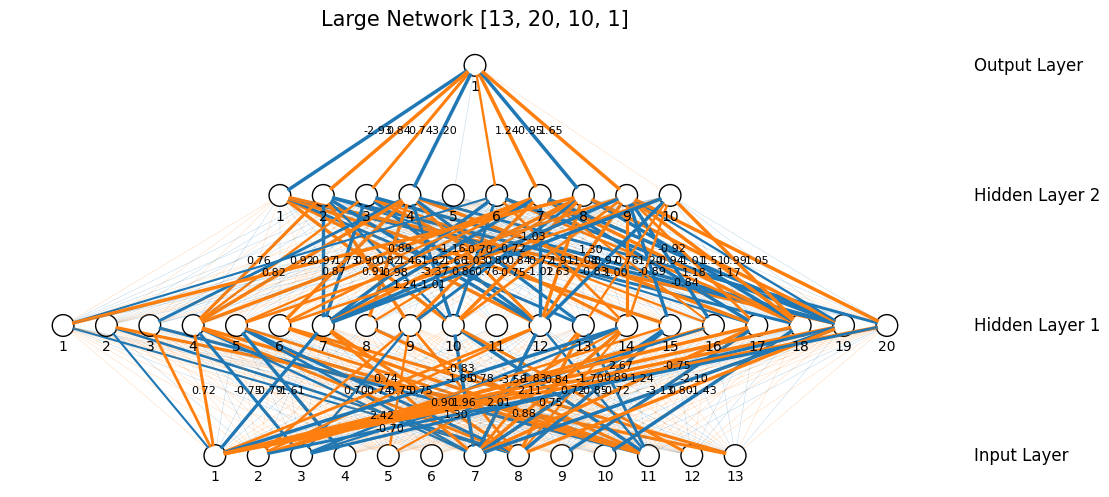

In [69]:
#Keep cell

network_structure = [13, 20, 10, 1]
weights = model.coefs_

vis = DrawNN(
    network_structure,
    weights_list=weights,
    title=f"Large Network {network_structure}",
    max_linewidth=2.5,
    linewidth_base=0.1,
    linewidth_scale_tier1=3.0,
    linewidth_scale_tier2=6.0,
    weight_text_show_threshold=0.7 # Show fewer weight texts for clarity
)
vis.draw()


The blue connections are negative weights and the orange ones are positive.

### Predicting

Next, we can start predicting unknown behaviour, which - as said - we simulate with the test dataset. Run `y_pred = model.predict(X_test)`.

In [70]:
y_pred = model.predict(X_test)

## Evaluate Model

Let's check out the details of our predictions and evaluate our results. To this end, we compare the predictions with test data using sklearn's confusion matrix function which prints the true positives, false negatives, false positives and true negatives . Don't know what those are? Check out: https://en.wikipedia.org/wiki/False_positives_and_false_negatives.

Run the next cell.

In [71]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm


array([[10364,  2131],
       [ 3001,  7304]])

You can also ask Gemini to explain the code. Prompt it with 'Please explain what the previous code cell does.'

Check https://en.wikipedia.org/wiki/Confusion_matrix for how to read this matrix but also don't worry, we will make a nicer representation. For the moment, we are only interested in the overall performance by looking at the accuracy of our prediction.

Accuracy is defined as the number of times our predictions have been correct compared to the overall number of predictions. So, we take all cases where the predictions have been right in the above table (bad-bad and good-good) and compare these with the overall number of observations in the test data or len(test_set). Please replace in the calculation below the numbers you have got.

In [72]:
good_good = 10490
bad_bad = 7320

(good_good + bad_bad) / len(test_set)

0.781140350877193

In my case, ~78% of our predictions are correct. Please, note that the exact number can be either a bit higher or lower depending on the random composition of the test and training datasets.

Not bad, especially considering that most music experts would probably not be able to agree to such a degree. However, we would of course like to improve on our predictions. So, let's investigate supervised machine learning further in the workshop.

But first let's make our confusion matrix a bit nicer. Run the next cell for a visualisation of the confusion matrix.

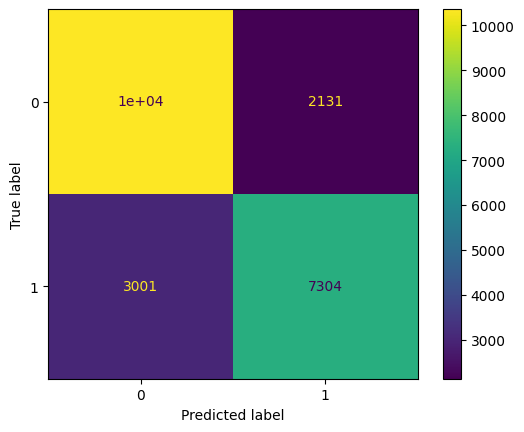

In [73]:
from sklearn.metrics import ConfusionMatrixDisplay

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()
plt.show()

That was it for modelling with supervised learning. It might seem complicated at first but it is really not, as the same steps are repeated again and again: from getting data, to cleaning data, to creating training and test data to finally running a model and evaluating it.

In the second part of today's lecture, we concentrate on clustering and unsupervised learning. We introduce a standard, old but still very effective method called k-means.

# Unsupervised Machine Learning

## Our Data: Social Networking Communities

A popular application of clustering is detecting communities in social relationships.  Next we go through an example and dataset in Brett Lantz's excellent book on Machine Learning (Lantz, B. (2013). Packt Publishing Ltd.). The dataset is discussed on pp. 279. It covers the relationships in a Social Networking Service (SNS). While this is a very early SNS dataset, the data is freely available and offers similar kind of insights you can gain from my recent examples. https://github.com/stedy/Machine-Learning-with-R-datasets/tree/master has collected all the datasets from the book.

Lantz explains that the dataset was compiled for sociological research on teenage identities at Notre Dame University. It represents a random sample of 30,000 US high school students who had profiles on a well-known SNS in 2006. At the time the data was collected, the SNS was a popular web destination for U.S. teenagers. Therefore, it is reasonable to assume that the profiles represent a fairly wide cross-section of US-American teenagers in 2006. The data was sampled evenly across four high school graduation years (2006 through 2009) representing the senior, junior, second-year and freshman classes at the time of data collection. Then, the full texts of the SNS profiles were downloaded. Each teen's gender, age and number of SNS friends was recorded.

A text-mining tool was used to divide the remaining SNS page content into words. We will learn later in this course, how this can be done. From the top 500 words appearing across all pages, 36 words were chosen to represent five categories of interests, namely extracurricular activities, fashion, religion, romance and antisocial behaviour. The 36 words include terms such as football, sexy, kissed, bible, shopping, death, drugs, etc. The final dataset indicates, for each person, how many times each word appeared in the person's SNS profile.

First, we load the relevant packages and the dataset from https://github.com/stedy/Machine-Learning-with-R-datasets/tree/master. Run the cell below.

In [74]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


teens = pd.read_csv("snsdata.csv")

Print out the first couple of rows from the teens dataset. You know how ...

In [75]:
teens

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The `teens` dataframe is now loaded into your environment. Take a close look and make sure you understand how it is produced.

We can use the `info()` method to output some general information about the dataframe. Run `teens.info()`.

In [76]:
teens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [77]:
teens.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2007.500000,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,...,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,...,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,...,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


## Data Cleaning

Part of this lesson is centered on the issue of looking into real-life data on digital society. A common problem is that observations/records are missing in such data, which is indicated by the NaN value in Python.

In the `info()` printout, you can also see that the non-null count is lower for those columns that contain NaN values. Gender is one of them.

Let's go through cleaning data, one step a time with the teens data. We start with the gender troubles.

Print out the absolute non-null value counts for gender as well as the relative ones with:
```
print(teens['gender'].value_counts())
print(teens['gender'].value_counts(normalize=True))
```

In [78]:
print(teens['gender'].value_counts())
print(teens['gender'].value_counts(normalize=True))

gender
F    22054
M     5222
Name: count, dtype: int64
gender
F    0.80855
M    0.19145
Name: proportion, dtype: float64


With dropna set to False in `value_counts()`, we can also see NaN index values. Try that ...

In [79]:
print(teens['gender'].value_counts(dropna=False))
print(teens['gender'].value_counts(normalize=True, dropna=False))

gender
F      22054
M       5222
NaN     2724
Name: count, dtype: int64
gender
F      0.735133
M      0.174067
NaN    0.090800
Name: proportion, dtype: float64


Let's ask Gemini how to replace the NaN values in teens['gender'].

In [80]:
teens['gender'] = teens['gender'].fillna('Unknown')
print(teens['gender'].value_counts(dropna=False))
print(teens['gender'].value_counts(normalize=True, dropna=False))

gender
F          22054
M           5222
Unknown     2724
Name: count, dtype: int64
gender
F          0.735133
M          0.174067
Unknown    0.090800
Name: proportion, dtype: float64


That gives us some interesting options, which we will explore later on in more detail.

But missing values are not our only problem. At least as common are misreported observations in real-life data. As an example, let's look at the at the age-distribution of the teens' age. You can do this in several ways but you should always print out maximum and minimum values. Run: `teens['age'].describe()`.

In [81]:
teens['age'].describe()

,age
count,24914.000000
mean,17.993950
std,7.858054
min,3.086000
25%,16.312000
50%,17.287000
75%,18.259000
max,106.927000


There are quite a few strange records here. Teens can have a minimum age of less than 4 and a maximum age of over 100! These cannot be considered teenagers.

As a rule of thumb, let's assume teenagers are between 13 and 19 years old. Let's mark all other teens' age entries as invalid. We say that invalid entries should have a NaN value. Set this, please, by typing in `teens.loc[(teens['age'] < 13) | (teens['age'] >= 20), 'age'] = np.nan`.

In [82]:
teens.loc[(teens['age'] < 13) | (teens['age'] >= 20), 'age'] = np.nan
teens['age'].describe()

,age
count,24477.000000
mean,17.252429
std,1.157465
min,13.027000
25%,16.304000
50%,17.265000
75%,18.220000
max,19.995000


The next step in our data-cleaning process is to replace NaN values. One common approach is to simply remove all rows/observations, for which we have null entries. But in this example, we would lose too many rows from `teens` with such a brute-force approach. So, let's try and fill the null values with estimated values.

Let's start with the gender and replace null values by creating new columns for male and females. Please note that many datasets assume a binary division of gender, which is wrong. But we are only practicing here.

To this end, we first create a new column to record all the female teenagers. Create a new column 'female' that is set to 1 if the teenager is female and 0 otherwise. Run `teens.loc[(teens['gender'] == 'F') & (teens['gender'].notna()), 'female'] = 1` to set the female column to 1 for females. `notna()` selects all rows that are not NaN. Pandas has many such functions, which you do not all need to remember. This is what you have your favourite chatbot for.

In [83]:
teens.loc[(teens['gender'] == 'F') & (teens['gender'].notna()), 'female'] = 1

Can you set the female column to 0 for males? You just need to change one letter ...

In [84]:
teens.loc[(teens['gender'] == 'M') & (teens['gender'].notna()), 'male'] = 1

Next we will create another column for the null values in gender we want to call no_gender. Set this to 1 if no gender is recorded and otherwise to 0.

This process is called dummy-coding and is typical to machine learning: https://en.wikipedia.org/wiki/Dummy_variable_(statistics). A dummy variable is a numerical variable used in the analysis to represent subgroups - in our case males, females and others. In research design, a dummy variable is often used to distinguish different groups to address them differently. By creating a separate column per gender entry, we can compute clusters for separate gender communities.

Check out dummy-coding on the web. Can you find easier ways to do this in Pandas? Let's ask Gemini "What is dummy coding and how do I dummy-code teens['gender']".


In [85]:
gender_dummies = pd.get_dummies(teens['gender'], prefix='gender')
teens = pd.concat([teens, gender_dummies], axis=1)

If `pd.get_dummies(teens, columns=['gender'])` is run, it will create `gender_F`, `gender_M` (and potentially `gender_NaN` if `dummy_na=True`). The manual steps create female (1 for F, 0 for M) and no_gender. The approaches are thus slightly different but achieve similar goals. The manual approach requires filling NaNs in the 'female' column for those that are 'no_gender'.

We continue with our own manual approach and run:
```
teens.loc[teens['gender'].notna(), 'no_gender'] = 0
teens.loc[teens['gender'].isna(), 'no_gender'] = 1
```

In [86]:
teens.loc[teens['gender'].notna(), 'no_gender'] = 0
teens.loc[teens['gender'].isna(), 'no_gender'] = 1

After this, we have the original column, a new column called female, which contains information about whether the teen is female or not (male) and a new column with information about whether the gender value is missing. Using this column we could, for instance, check with clustering whether certain communities have a tendency not to record their gender values. How?

Check out the changes with `teens.head(20)`. You have to scroll all the way to the right to find the new columns.

In [87]:
teens.head(20)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,die,death,drunk,drugs,female,male,gender_F,gender_M,gender_Unknown,no_gender
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,NaN,1.0,False,True,False,0.0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,0,0,0,1.0,NaN,True,False,False,0.0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,1,0,0,NaN,1.0,False,True,False,0.0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,1.0,NaN,True,False,False,0.0
4,2006,Unknown,18.995,10,0,0,0,0,0,0,...,0,0,1,1,NaN,NaN,False,False,True,0.0
5,2006,F,NaN,142,0,0,0,0,0,0,...,0,0,1,0,1.0,NaN,True,False,False,0.0
6,2006,F,18.930,72,0,0,0,0,0,0,...,0,0,0,0,1.0,NaN,True,False,False,0.0
7,2006,M,18.322,17,0,0,0,1,0,0,...,0,0,0,0,NaN,1.0,False,True,False,0.0
8,2006,F,19.055,52,0,0,0,0,0,0,...,0,0,0,0,1.0,NaN,True,False,False,0.0
9,2006,F,18.708,39,0,0,0,0,0,0,...,0,0,0,0,1.0,NaN,True,False,False,0.0


It's very easy now to calculate the number of teenagers where we do not have gender entries for. How? Remember `sum()`?

In [88]:
(teens['gender'] == 'Unknown').sum()

np.int64(2724)

Did you find that there are 2724?

The age column is next. Can you find the average age and take care that null values are discounted?

Tip: run Pandas' `mean()` and set `skipna = True` to skip NaN values: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html

In [89]:
teens['age'].mean(skipna=True)

np.float64(17.252428933284307)

What would happen if you set skipna to False? Try in the above cell.

A good strategy to overwrite missing age values would be to use the average age value and assign it to all of the missing ones. This process is called mean-imputation and is employed frequently. Pandas has some real strengths here. Check out https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html.

Pandas makes your life very easy with its `fillna` function. Run the following cell. BTW, Gemini had given me a similar solution.

In [90]:
teens['age'].fillna(teens['age'].mean()).quantile([.25, .5, .75])

,age
0.25,16.512000
0.50,17.252429
0.75,18.004000


Let's further improve this with some good old-fashioned human intelligence and beat Gemini.

We feel confident that we can do better than just the mean, because we know the graduation year, too. This is the year our teens are supposed to graduate. It seems a reasonable assumption that those teenagers with an earlier graduation year should be older than those with a later graduation.

We can easily find this out by running the mean function for each graduation year group separately. Type in `teens[['gradyear', 'age']].groupby(['gradyear']).mean()`.

In [91]:
teens[['gradyear', 'age']].groupby(['gradyear']).mean()

,age
gradyear,
2006,18.655858
2007,17.706172
2008,16.767701
2009,15.819573


Let's take a moment and look at `groupby()` once more, as it is essential knowledge to deal with Pandas: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html. It is at the heart of the split-apply-combine paradigm that will keep us often busy: https://pandas.pydata.org/docs/user_guide/groupby.html. Take a close read and you will see that we  cover all its elements throughout the session today. Groupby allows you to to 'split' data into distinct groups. This is often done with the intention to then 'apply' functions afterwards like in our case `mean()`. This works amazingly well but requires lots of practice in my experience. This will come to you but for now let's move on.

According to our last output, our suspicion has proven right. There is a significant difference in the average ages depending on the graduation year. Let's use this knowledge and update missing values in the age group depending on the graduation year. To this end, you actually have to do a lot of Pandas labour, which demonstrates that 80% of the work of a data analyst lies in working with data. But I am sure you know this by now.

You can, e.g., proceed with the following strategy: Create first a temporary dataset with the results from the above `group_by`. Then merge this new dataset with teens and replace the null values of `teens['age']` with the ones from the temporary dataset.

Create the temporary dataset first with `ave_age = teens[['gradyear', 'age']].groupby(['gradyear'], as_index=False).mean()`. Also print out `ave_age`. It should be a data frame of three rows.

Wondering about `as_index=False`? Check out https://pandas.pydata.org/docs/user_guide/groupby.html. We simply do not want to create a new index from the groupby argument gradyear.

In [92]:
ave_age = teens[['gradyear', 'age']].groupby(['gradyear'], as_index=False).mean()
ave_age

,gradyear,age
0,2006,18.655858
1,2007,17.706172
2,2008,16.767701
3,2009,15.819573


Update the teens age columns but make sure that in the end you have not added additional columns. First you need to merge `teens` and `ave_age` on `gradyear`. Run `teens = pd.merge(teens, ave_age, on=['gradyear'])`. Then also print out the first few columns of teens.

Merge is another powerful command to learn about. It's part of the merge, join, concatenate and compare group of commands; some of which we have already met: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html. If you happen to know database languages, you will know everything about it. `merge()` combines two dataframes on common columns - in our case `gradyear`.

In [93]:
teens = pd.merge(teens, ave_age, on=['gradyear'])
teens.head()

,gradyear,gender,age_x,friends,basketball,football,soccer,softball,volleyball,swimming,...,death,drunk,drugs,female,male,gender_F,gender_M,gender_Unknown,no_gender,age_y
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,NaN,1.0,False,True,False,0.0,18.655858
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,0,0,1.0,NaN,True,False,False,0.0,18.655858
2,2006,M,18.335,69,0,1,0,0,0,0,...,1,0,0,NaN,1.0,False,True,False,0.0,18.655858
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,1.0,NaN,True,False,False,0.0,18.655858
4,2006,Unknown,18.995,10,0,0,0,0,0,0,...,0,1,1,NaN,NaN,False,False,True,0.0,18.655858


With some scrolling right, you should now see two age columns. age_x is the original one from teens, while age_y is the estimated value based on the gradyear. Now, we want to replace `age_x` (the original value) with `age_y` if `age_x` is NaN. Run `teens.loc[(teens['age_x'].isna()), 'age_x'] = teens['age_y']`.

In [94]:
teens.loc[(teens['age_x'].isna()), 'age_x'] = teens['age_y']
teens.head()

,gradyear,gender,age_x,friends,basketball,football,soccer,softball,volleyball,swimming,...,death,drunk,drugs,female,male,gender_F,gender_M,gender_Unknown,no_gender,age_y
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,NaN,1.0,False,True,False,0.0,18.655858
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,0,0,1.0,NaN,True,False,False,0.0,18.655858
2,2006,M,18.335,69,0,1,0,0,0,0,...,1,0,0,NaN,1.0,False,True,False,0.0,18.655858
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,1.0,NaN,True,False,False,0.0,18.655858
4,2006,Unknown,18.995,10,0,0,0,0,0,0,...,0,1,1,NaN,NaN,False,False,True,0.0,18.655858


Now, we only need to so some cleaning up. Give `age_x` its old name age back and drop `age_y`, which we don't need anymore. Run the cell below.

In [95]:
#Keep cell
teens.rename(columns={'age_x': 'age'}, inplace=True)
teens.drop('age_y', axis=1, inplace=True)

Use `teens.info()` to see that the age column does not contain NaNs anymore.

In [96]:
teens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 46 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gradyear        30000 non-null  int64  
 1   gender          30000 non-null  object 
 2   age             30000 non-null  float64
 3   friends         30000 non-null  int64  
 4   basketball      30000 non-null  int64  
 5   football        30000 non-null  int64  
 6   soccer          30000 non-null  int64  
 7   softball        30000 non-null  int64  
 8   volleyball      30000 non-null  int64  
 9   swimming        30000 non-null  int64  
 10  cheerleading    30000 non-null  int64  
 11  baseball        30000 non-null  int64  
 12  tennis          30000 non-null  int64  
 13  sports          30000 non-null  int64  
 14  cute            30000 non-null  int64  
 15  sex             30000 non-null  int64  
 16  sexy            30000 non-null  int64  
 17  hot             30000 non-null 

Success!

Check out new `ave_age` with `teens['age'].mean()`.

In [97]:
teens['age'].mean()

np.float64(17.237326101865737)

This has all been quite advanced stuff but as long as you remember the kind of steps we have taken you should be able to impute one column's missing values by using another column as a reference. In our case, we use our knowledge that age is dependent on `gradyear` to find the missing values. Please, take some time to review the steps.

Let's also ask Gemini for an example of imputation in Pandas.

In [98]:
# prompt: Give me an example of imputation in Pandas

import pandas as pd
import numpy as np
# Sample DataFrame with missing values
df = pd.DataFrame({'A': [1, 2, np.nan, 4],
                   'B': [5, np.nan, np.nan, 8],
                   'C': [9, 10, 11, 12]})

# Impute missing values in column 'B' with the mean
df['B'].fillna(df['B'].mean(), inplace=True)

print(df)


     A    B   C
0  1.0  5.0   9
1  2.0  6.5  10
2  NaN  6.5  11
3  4.0  8.0  12


/tmp/ipython-input-3384606495.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['B'].fillna(df['B'].mean(), inplace=True)


Let's take a look at our hard work and the resulting `age` column with `teens['age'].describe()`.

In [99]:
teens['age'].describe()

,age
count,30000.000000
mean,17.237326
std,1.141821
min,13.027000
25%,16.282000
50%,17.238000
75%,18.212000
max,19.995000


This looks much better. We have now learned how to delete missing values completely or impute them using background knowledge.

After we have dealt with the missing records, I think we are ready to cluster. We will use k-means without actually referring to either age nor gender. Sorry! But it is good that you have learned how to deal with missing values, and we will use this knowledge later.

## K-means

To explore unsupervised machine learning, we look at the basics of clustering that delivers you powerful results very fast. In particular, we will use the k-means algorithm, which was invented by MacQueen in the late 1960s (https://en.wikipedia.org/wiki/K-means_clustering). Despite being ancient in terms of computer lives, k-means is still widely used, because it delivers good results with great computational performance. Computational performance in computing describes the effort we need in terms of computational resources. You will generally notice performance by the execution time.

https://machinelearningmastery.com/clustering-algorithms-with-python/ provides a good overview of clustering algorithms that are implemented in Python.

k-means tries to develop clusters by (1) initialising a pre-defined number (k) of randomly chosen centroids in the feature space. Centroids are simply the centre points of clusters. (2) The algorithm assigns each observation to the cluster with the closest centroid. (3) Based on how balanced this assignment is, the centroids are recalculated, and steps 1 and 2 are repeated until the algorithm balances out.


Let's move on to some actual work with `teens`.

Please create an `interests` dataframe by selecting columns 4 to 40 from `teens` with `interests = teens.iloc[:,4:40]`. Also, print out the first few rows of `interests`.

In [100]:
interests = teens.iloc[:,4:40]
interests.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Since k-means is based on calculating distances between data points and their centroids, it will be strongly influenced by the magnitudes of the variables we cluster. Think about if for a moment! Just imagine one column having values running from 1 to 10 and another from 1 to 1000. How could we compare distances between them?

k-means is thus very sensitive to input of varying size, length, etc. We have interests of very different ranges, as they are simply based on how many times a keyword appears in teenagers' social networking contributions.

We therefore need to scale the values again so that they all fall into the same range. You remember this from supervised-machine learning? Then, we did it manually. Now, we make use of Python packages.

Run `from scipy.stats import zscore` to import zscore, which is very popular in data analysis for standardisation: https://www.statisticshowto.com/probability-and-statistics/z-score/

In [101]:
from scipy.stats import zscore

Apply `zscore` and assign the results to a new dataframe interests_z with `interests_z = interests.apply(zscore)`. Finally, print out the first few columns.

In [102]:
interests_z = interests.apply(zscore)
interests_z.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
1,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,...,-0.050937,1.067392,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
2,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,2.027908,-0.220403,-0.174908
3,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
4,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,...,-0.050937,-0.369915,2.273673,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,2.285122,2.719316


It's clearly normalized around the means of the various columns - by the distance of the standard deviation.

Let's import KMeans from `sklearn.cluster`. Run the cell below.

In [103]:
#Keep cell

from sklearn.cluster import KMeans

Many of the decisions in analytics are more an art than a science. We need to often estimate many parameters – either based on previous experience or using background knowledge. K-means is famous for heavily depending on `k` or the number of clusters we want to assign. We need to tell Python which `k` to use. We explore this further in the workshop.

We decide 5 clusters is enough and assign `k = 5`. Run the cell below.

In [104]:
#Keep cell

k = 5

Now we are ready to cluster. Fit `interests_z` and assign it to `teen_clusters` the way you know. It is just a copy and paste job from before.

In [105]:
from sklearn.cluster import KMeans

# Set number of clusters
k = 5

# Initialize KMeans
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit KMeans to the standardized data
kmeans.fit(interests_z)

# Assign cluster labels to each teen
teen_clusters = kmeans.labels_

# Optional: create a DataFrame with teens and their cluster labels
import pandas as pd
teen_clusters_df = pd.DataFrame({'Cluster': teen_clusters})
teen_clusters_df.head()


,Cluster
0,0
1,2
2,0
3,0
4,1


Let's investigate the size of the clusters with `.labels_` and `np.bincount`. Run `np.bincount(teen_clusters.labels_)`.

??? is .lables_ needed?

In [106]:
import numpy as np

# Count the number of teens in each cluster
cluster_sizes = np.bincount(teen_clusters)
print(cluster_sizes)


[22073  1076  5545   694   612]


In [107]:
np.bincount(kmeans.labels_)

array([22073,  1076,  5545,   694,   612])

In [108]:
np.bincount(teen_clusters)

array([22073,  1076,  5545,   694,   612])

I have noticed very different results depending on the kmeans results. I suggest to rerun kmeans a couple of times until you see a distribution that looks ok. You want to especially avoid clusters of only one 1 item but we are just practicing here.

We can also look at the centroids/centres with `teen_clusters.cluster_centers_`. You can can pretty-print this in a data frame. Run:
```
interests_centroids = pd.DataFrame(teen_clusters.cluster_centers_, columns=interests_z.columns)
interests_centroids
```

In [109]:
interests_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=interests_z.columns)
interests_centroids

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,-0.150472,-0.147011,-0.083720,-0.110951,-0.113260,-0.102877,-0.153752,-0.093067,-0.052164,-0.117312,...,-0.028583,-0.192474,-0.235366,-0.190020,-0.153251,-0.147365,-0.092394,-0.075491,-0.088569,-0.112472
1,0.371137,0.389386,0.136083,0.158999,0.100191,0.273941,0.081788,0.279837,0.104324,0.805715,...,0.364873,0.631925,0.286327,1.292324,0.414933,0.465247,1.674051,0.929999,1.733254,2.611724
2,0.489989,0.456747,0.296858,0.399476,0.416255,0.335682,-0.068674,0.293157,0.182900,0.309177,...,0.031674,0.625303,0.816361,0.487471,0.498034,0.459222,0.022980,0.090564,0.010613,-0.061286
3,0.197814,0.385904,0.050900,0.082064,0.096069,0.088427,5.387436,0.146867,-0.026784,0.005699,...,0.088535,0.243115,0.513245,0.127866,0.334548,0.353028,-0.029454,0.005681,-0.018228,-0.012264
4,0.102324,0.033804,0.027910,0.002972,0.021454,0.081377,-0.086603,0.036897,0.068122,0.001181,...,0.001222,-0.120970,-0.006848,0.010780,-0.102525,-0.071976,0.212798,0.258457,0.070271,0.033174


Each row corresponds to a cluster, and each column corresponds to a feature. So, the values in `interests_centroids` represent the average value of each feature for the samples in the respective cluster. The maximum average value is the most likely cluster they belong to.

A simple way to detect clusters is thus to find the maximum values in the columns. Try it by using the `idxmax()` function from Pandas: `interests_centroids.idxmax()`. Check out its documentation.

In [118]:
# Get the cluster where each interest is strongest
dominant_cluster = interests_centroids.idxmax()

# For each cluster, list the interests where it is dominant
top_interests_per_cluster = dominant_cluster.groupby(dominant_cluster).apply(lambda x: x.index.tolist())

top_interests_per_cluster


,0
1,"[sports, sex, sexy, kissed, band, marching, mu..."
2,"[basketball, football, soccer, softball, volle..."
3,[cheerleading]
4,"[god, church, jesus, bible]"


Hopefully, your results look similar to the table from Lantz (2013) on p. 288:

![alt text](https://github.com/goto4711/cdai/blob/main/teen-clusters.png?raw=true "")

Do the names of the clusters make sense to you? Do you remember all those teenage movies you watched?

Next, let's continue with another type of analysis and do some further reasoning on the data with the new insights.

## Analyse Results

Let's first assign each teen to a cluster. Please, add a column called 'cluster' to the teen dataframe with `teens['cluster'] = np.array(teen_clusters.labels_)`.

In [111]:
teens['cluster'] = np.array(teen_clusters)

Let's take a look at `teens` with `head()`. All the way to the right, you can find the cluster assignment.

In [112]:
teens.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,death,drunk,drugs,female,male,gender_F,gender_M,gender_Unknown,no_gender,cluster
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,NaN,1.0,False,True,False,0.0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,0,0,1.0,NaN,True,False,False,0.0,2
2,2006,M,18.335,69,0,1,0,0,0,0,...,1,0,0,NaN,1.0,False,True,False,0.0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,1.0,NaN,True,False,False,0.0,0
4,2006,Unknown,18.995,10,0,0,0,0,0,0,...,0,1,1,NaN,NaN,False,False,True,0.0,1


Let's print out the first 5 teens and only the columns 'cluster', 'gender', 'age' and 'friends'. I hope you remember how this works. How do we select the first 5 rows? How do we select the columns?

Tip: `teens.loc` is what you are looking for.

In [113]:
teens.loc[0:4, ['cluster', 'gender', 'age', 'friends']]

,cluster,gender,age,friends
0,0,M,18.982,7
1,2,F,18.801,0
2,0,M,18.335,69
3,0,F,18.875,0
4,1,Unknown,18.995,10


Since we have learned earlier how to group by particular interests, let's aggregate the teens' features using the clusters.

Print out the average ages per cluster. Do you remember how this works? Tip: Replace `gradyear` in the earlier `group_by` statements with `cluster` and you are ready to go.

In [114]:
teens.groupby('cluster')['age'].mean()

,age
cluster,
0,17.302385
1,17.109018
2,17.020497
3,16.973915
4,17.379696


The clusters do not differ in terms of ages very much. There is no immediate relation between age and interest clusters. Now, let's look at the female contribution to each cluster. How? Which column to you have to use instead of age?

In [115]:
teens.groupby('cluster')['gender'].value_counts()

cluster  gender 
0        F          15368
         M           4486
         Unknown     2219
1        F            867
         M            151
         Unknown       58
2        F           4733
         M            463
         Unknown      349
3        F            631
         Unknown       55
         M              8
4        F            455
         M            114
         Unknown       43
Name: count, dtype: int64

Overall, 74 per cent of the SNS's users are female. That's why they contribute so much to each cluster. Can you see the cluster that has the most female users? Do you know why? Look back to the earlier analysis of the interests linked to the clusters ...

But please note that we set earlier female to 1 or 0 only where gender is not NaN. So, for 'no_gender' individuals, `teens['female']` will be NaN. `groupby().mean()` will skip these NaNs by default. This is important for the interpretation, as the mean is now only the proportion of females among those whose gender is known in that cluster.

You can check for the average number of friends per cluster now. Just define the target of the aggregation per cluster as friends instead of female or age in the expressions above.

In [116]:
teens.groupby('cluster')['friends'].mean()

,friends
cluster,
0,27.757305
1,30.735130
2,38.070875
3,39.443804
4,34.557190


Here, the differences are stronger. We suspect that the number of friends played a key role in assigning the clusters. That's the nature of a social network, I guess.

Let's finally ask Gemini about the advantages and drawbacks of k-means and possible alternatives with examples.

In the workshop, we will simply go one more time through another example of clustering and supervised machine learning. There are always the same steps involved in data science. These steps are the main lesson of today:

1. Get data
1. Clean data and prepare it for the machine-learning algorithm you have chosen
1. Run machine learning
1. Evaluate, analyse and report

Step 2 is by far the most difficult one, as the machine learning is easier with modern packages like sklearn. But it is also always hard to analyse the results.